In [83]:
#Gaberial Campese
#DATS 6202
#Assignment #3

In [84]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [85]:
#Read in data 
#I typed my data into Excel with the provided data and saved as CSV format 
data = pd.read_csv('computerData.csv')

In [86]:
data.head()

,RID,age,income,student,credit_rating,Class: buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes


In [87]:
data1 = data.drop(['RID'], axis=1) #drop RID as it does not contribute to our target

In [88]:
data1.head(14)

,age,income,student,credit_rating,Class: buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_aged,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [89]:
#Label Encoder
le = preprocessing.LabelEncoder() #Using encoder to encode categoricals because after trial and error...
#I discovered we cannot pass categorical values into the DecisionTreeClassifier as they must be numeric

In [90]:
LE_data = data1.apply(le.fit_transform) #fit/transform
LE_data.head(14) #we see that the categorical values have been replaced with integers
#I tried to use One Hot Encoder, but I was having problems with it. 
#Not entirely sure which one is more appropriate?

,age,income,student,credit_rating,Class: buys_computer
0,2,0,0,1,0
1,2,0,0,0,0
2,0,0,0,1,1
3,1,2,0,1,1
4,1,1,1,1,1
5,1,1,1,0,0
6,0,1,1,0,1
7,2,2,0,1,0
8,2,1,1,1,1
9,1,2,1,1,1


In [91]:
target = LE_data['Class: buys_computer'] #set target

In [92]:
features = LE_data.loc[:, data1.columns != 'Class: buys_computer'] #set features

In [93]:
features

,age,income,student,credit_rating
0,2,0,0,1
1,2,0,0,0
2,0,0,0,1
3,1,2,0,1
4,1,1,1,1
5,1,1,1,0
6,0,1,1,0
7,2,2,0,1
8,2,1,1,1
9,1,2,1,1


In [94]:
target

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Class: buys_computer, dtype: int64

In [95]:
#Initialize X and y
X = features #age, income, student, credit_rating
y = target #buy computer or not

In [96]:
X

,age,income,student,credit_rating
0,2,0,0,1
1,2,0,0,0
2,0,0,0,1
3,1,2,0,1
4,1,1,1,1
5,1,1,1,0
6,0,1,1,0
7,2,2,0,1
8,2,1,1,1
9,1,2,1,1


In [97]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Class: buys_computer, dtype: int64

In [108]:
tree_computer = DecisionTreeClassifier(max_depth=3) #DecisionTreeClassifier using Gini criterion by default
tree_computer.fit(X, y) #fit to X and y

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
feature_names1 = ['age', 'income', 'student', 'credit_rating'] #initialize feature names needed for exporting next

In [110]:
#Visualize Decision Tree with export_graphviz
export_graphviz(
tree_computer,
out_file="tree_computer.dot",
feature_names=feature_names1,
class_names=['yes', 'no'],
rounded=True,
filled=True
)

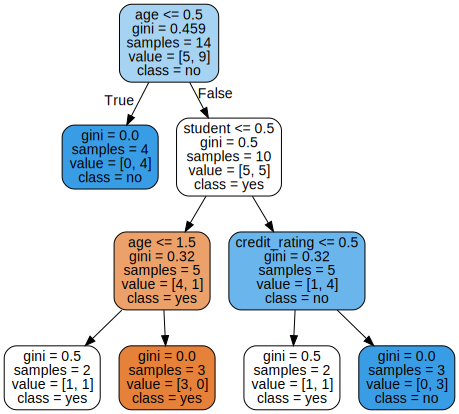

In [111]:
#Finally, display decision tree
import graphviz 

with open("tree_computer.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [103]:
#Comparison to Decision Tree by Hand:
#Both have same root node being age. Same attr selection logic since they are both Gini. 
#However my Python version appears to be different than the Decision Tree I did by hand depending on the 
#max depth parameter value that I choose.